# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests

In [2]:
#Load the twitter archive into a Dataframe
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#load the image predictions file and write it to imaga-prediction.tsv using request method

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)


In [5]:
#Load the image prediction file into Dataframe     
image_pred_df = pd.read_csv('image-predictions.tsv',sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# Read file line by line to create Dataframe
tweets_data = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
# Appending the tweet data to a list of dictionary        
        try:
            tweet = json.loads(line)
            tweets_data.append({'tweet_id': tweet['id'],
                                'retweet_count': tweet['retweet_count'],
                                'favorite_count': tweet['favorite_count']
                                })

            
        except:
            
            continue
            
df_api = pd.DataFrame(tweets_data, columns=['tweet_id', 'retweet_count', 'favorite_count'])                

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
df_arch.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778039087...,12,10,None,None,None,pupper,None
1247,711652651650457602,NaN,NaN,2016-03-20 20:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He just wanted to say hi. 9/10 v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711652651...,9,10,Gary,None,None,None,None
1238,712097430750289920,NaN,NaN,2016-03-22 02:03:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't even comprehend how confused this dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712097430...,10,10,None,None,None,None,None
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,NaN,NaN,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,None,None,None,None
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. Her tennis ball slowly rolled d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680583894...,8,10,Penny,None,None,None,None
2240,667924896115245057,NaN,NaN,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None,None,None,None


In [9]:
df_arch.shape

(2356, 17)

In [10]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Checking for duplicate in the df_arch
sum(df_arch.duplicated())

0

In [12]:
# Checking number of retweet
df_arch.retweeted_status_user_id.count()

181

In [13]:
# Sorting by the rating_numerator
df_arch.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [14]:
# Sorting by the rating_denorminator
df_arch.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [15]:
# Sorting by name
df_arch.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [16]:
df_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1000,708711088997666817,https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg,2,tennis_ball,0.912961,False,German_short-haired_pointer,0.052695,True,Labrador_retriever,0.018477,True
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
101,667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,0.008164,True
410,673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True


In [19]:
# Checking the number of record in df_arch that their tweet_id is missing in image_pred_df
len(df_arch[~df_arch.tweet_id.isin(image_pred_df.tweet_id)])

281

In [20]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [22]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [23]:
df_api.sample(5)

,tweet_id,retweet_count,favorite_count
1739,679475951516934144,728,2304
2295,667073648344346624,134,425
685,788070120937619456,3952,0
960,750868782890057730,1595,5306
301,836648853927522308,626,0


In [24]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
1. The rating_denorminator colunms have value greater and less than 10

2. The rating_numerator columns have value considerable values greater than 10

3. Their is a lot of NAN values in the in_reply_to_status_id, reply_to_user_id

4. The timestamp in df_arch as the wrong datatypes

5. The source columns as unnecessary html anchor and href tag

6. Errors of name in the name columns e.g (infuriating, a, by, the, space, etc) 

7. Considerable number of tweet without image

8. timestamp and retweet_status_timestamp are not a datetime variable

9. The names columns are not in the standard form

10. Consederable numbers of retweet

### Tidiness issues
1. Removing the three empty columns from df_arch_clean table (i.e retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) 

2. The source and expanded_url column have several information in them

3. doggo, floofer, pupper, puppo columns in arch_df should be merged into one column named dog_stage

4. The retweet_count and favorite_count columns in the df_api table should be joined to the df_arch table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data

df_arch_clean = df_arch.copy()

df_tweet_api = df_api.copy()

df_image = image_pred_df.copy()

### Quality #1: Removing duplicate from retweet

#### Define:  
Keeping the original tweet only

In [26]:
df_arch_clean = df_arch_clean[df_arch_clean.retweeted_status_id.isnull()]

#### Code

In [27]:
df_arch_clean.retweeted_status_user_id.count()

0

### Quality #2:The names columns are not in standard form

#### Define:  
Replacing lowercase values of name with "None"

#### Code

In [28]:
df_arch_clean[df_arch_clean.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [29]:
name_error = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']

In [30]:
for i in name_error:
    df_arch_clean.name.replace(i, "None", inplace=True)

#### Test

In [31]:
df_arch_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [32]:
df_arch_clean.name.value_counts()

None         784
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Lola           8
Winston        8
Sadie          8
Toby           7
Daisy          7
Koda           6
Jax            6
Bo             6
Bailey         6
Bella          6
Oscar          6
Stanley        6
Buddy          5
Bentley        5
Rusty          5
Scout          5
Dave           5
Milo           5
Chester        5
Leo            5
Louis          5
Cassie         4
Larry          4
            ... 
Brandy         1
Strudel        1
Zooey          1
Alexander      1
Marlee         1
Hermione       1
Jeffri         1
Mutt           1
Mimosa         1
Nigel          1
Iroh           1
Toffee         1
Kyro           1
Tilly          1
Darby          1
Boots          1
Norman         1
Eriq           1
Callie         1
Dudley         1
Tom            1
Lorelei        1
Darla          1
Seamus         1
Lacy           1
Arlo           1
Lulu           1
Margo         

### Quality #3: 
The timestamp, in_reply_to_status_id in df_arch as the wrong datatypes

#### Define
Converting timestamp and retweeted_status_timestamp to datetime datatype and in_reply_to_status_id and in_reply_to_user_id to integer datatypes

#### Code

In [33]:
# changing the timestamp to datetime datatype
df_arch_clean['timestamp'] = pd.to_datetime(df_arch_clean.timestamp)

In [34]:
# changing the timestamp to datetime datatype
df_arch_clean['retweeted_status_timestamp'] = pd.to_datetime(df_arch_clean.timestamp)

In [35]:
df_arch_clean[['in_reply_to_status_id', 'in_reply_to_user_id']] = df_arch_clean[['in_reply_to_status_id', 'in_reply_to_user_id']].fillna(0)

In [36]:
# Changing the datatype of both in_reply_to_status_id and in_reply_to_user_id to int
df_arch_clean[['in_reply_to_status_id', 'in_reply_to_user_id']] = df_arch_clean[['in_reply_to_status_id', 'in_reply_to_user_id']].astype(np.int64)

#### Test

In [37]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null int64
in_reply_to_user_id           2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    2175 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[

### Tidines #1: 
Removing the three empty columns from df_arch_clean table (i.e retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) 


#### Define
Droping the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from the df_arch_clean table

#### Code

In [38]:
df_arch_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [39]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 254.9+ KB


### Quality #4: 
Removing tweet with no image id

#### Define
Keeping only tweet that have images id

#### Code

In [40]:
df_arch_clean = df_arch_clean[df_arch_clean.tweet_id.isin(image_pred_df.tweet_id)]

In [41]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 233.7+ KB


#### Quality 5: 
The source columns as unnecessary html anchor and href tag

#### Define:
Removing the html and anchor tag from the source column and retain only text between the tags

#### Code

In [42]:
df_arch_clean['source']=df_arch_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#### Test

In [43]:
df_arch_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,0,0,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,None,None,None,None,None
929,754482103782404096,0,0,2016-07-17 01:05:25,Twitter for iPhone,This is Milo. He's currently plotting his reve...,https://twitter.com/dog_rates/status/754482103...,10,10,Milo,None,None,None,None
1860,675489971617296384,0,0,2015-12-12 01:38:53,Twitter for iPhone,RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None


In [44]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 233.7+ KB


In [45]:
# Changing the source datatype to categorical values
df_arch_clean['source'] =  df_arch_clean['source'].astype('category')

#### Test:

In [46]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(7)
memory usage: 220.1+ KB


In [47]:
# checking the categories of source data we have
df_arch_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Quality #5: 
The rating_denorminator colunms have value greater and less than 10

#### Define:
Assigning the value of 10 to the rating denorminator

#### Code:

In [48]:
df_arch_clean['rating_denominator'] = df_arch_clean['rating_denominator'] = 10

#### Test:

In [49]:
df_arch_clean.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

### Quality #6: 
Checking if if their are dog with more than one dog stage

In [50]:
# Checking to if e have dog with two or more stage 
print(len(df_arch_clean[(df_arch_clean.doggo != 'None') & (df_arch_clean.floofer != 'None')]))
print(len(df_arch_clean[(df_arch_clean.doggo != 'None') & (df_arch_clean.pupper != 'None')]))
print(len(df_arch_clean[(df_arch_clean.doggo != 'None') & (df_arch_clean.puppo != 'None')]))

1
9
1


#### Define:
We have records that have more than one dog stage. We are setting their value to None

#### Code 

In [51]:
# setting the pupper column as None for the records that have both doggo and pupper
df_arch_clean['pupper'][(df_arch_clean.doggo != 'None') & (df_arch_clean.pupper != 'None')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
# Checking to see which record to be set to None between puppo and doggo
for x, row in df_arch_clean[((df_arch_clean['doggo'] != 'None') & (df_arch_clean['floofer'] != 'None'))
                   | ((df_arch_clean['doggo'] != 'None') & (df_arch_clean['puppo'] != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))


855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk



In [53]:
# Setting the records to None 
df_arch_clean['doggo'][df_arch_clean.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [54]:
print(len(df_arch_clean[(df_arch_clean.doggo != 'None') & (df_arch_clean.floofer != 'None')]))
print(len(df_arch_clean[(df_arch_clean.doggo != 'None') & (df_arch_clean.pupper != 'None')]))
print(len(df_arch_clean[(df_arch_clean.doggo != 'None') & (df_arch_clean.puppo != 'None')]))

0
0
0


### Tidines #2:
doggo, floofer, pupper, puppo columns in arch_df should be merged into one column named dog_stage

In [55]:
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']
df_arch_clean[dog_stage] = df_arch_clean[dog_stage].replace('None', '')

#### Define:
Using melt function to merge the Dog stage into one column and named it dog_stage

#### Code:

In [56]:
df_arch_clean = pd.melt(df_arch_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name' ], var_name='stage', value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name ='dog_stage').drop(['stage'], 1)

In [58]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 11 columns):
tweet_id                 7976 non-null int64
in_reply_to_status_id    7976 non-null int64
in_reply_to_user_id      7976 non-null int64
timestamp                7976 non-null datetime64[ns]
source                   7976 non-null category
text                     7976 non-null object
expanded_urls            7976 non-null object
rating_numerator         7976 non-null int64
rating_denominator       7976 non-null int64
name                     7976 non-null object
dog_stage                7976 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 631.1+ KB


In [61]:
df_arch_clean.groupby(df_arch_clean.columns.tolist(), as_index=False).size()

tweet_id            in_reply_to_status_id  in_reply_to_user_id  timestamp            source              text                                                                                                                                                                    expanded_urls                                                                                                                                                                                                                                                    rating_numerator  rating_denominator  name      dog_stage
666020888022790149  0                      0                    2015-11-15 22:32:08  Twitter for iPhone  Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj                                     https://twitter.com/dog_rates/status/666020888022790149/photo/1                                                                            

In [62]:
df_arch_clean.drop_duplicates(subset=None, inplace=True)

In [63]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 0 to 6795
Data columns (total 11 columns):
tweet_id                 2300 non-null int64
in_reply_to_status_id    2300 non-null int64
in_reply_to_user_id      2300 non-null int64
timestamp                2300 non-null datetime64[ns]
source                   2300 non-null category
text                     2300 non-null object
expanded_urls            2300 non-null object
rating_numerator         2300 non-null int64
rating_denominator       2300 non-null int64
name                     2300 non-null object
dog_stage                2300 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 200.0+ KB


In [65]:
pd.value_counts(df_arch_clean['dog_stage'])

           1994
pupper      203
doggo        72
puppo        23
floofer       8
Name: dog_stage, dtype: int64

# Image Prediction

#### Define

In [66]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Capitalizing the first letters in p1, p2, p3 columns of the image prediction

In [67]:
df_image.p1 = df_image.p1.str.capitalize()

In [68]:
df_image.p2 = df_image.p2.str.capitalize()

In [69]:
df_image.p3 = df_image.p3.str.capitalize()

#### Test

In [70]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tweeter api Tweet, Retweet and Favorite Counts

#### Define

In [71]:
df_tweet_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Changing the tweet_id of the three Dataframe from integer to string for easy merging  

In [72]:
df_image.tweet_id = df_image.tweet_id.astype('str')
df_tweet_api.tweet_id = df_tweet_api.tweet_id.astype('str')
df_arch_clean.tweet_id = df_arch_clean.tweet_id.astype('str')

### Test

In [73]:
# Testing if they all change
type(df_image['tweet_id'].iloc[0])
type(df_tweet_api['tweet_id'].iloc[0])
type(df_arch_clean['tweet_id'].iloc[0])

str

## Merging the DataSet

#### Define
Combining the three  Dataset together for further analysis

#### Code

In [74]:
merge_df = pd.merge(df_arch_clean,df_image, on=['tweet_id'], how = 'inner')
merge_df = pd.merge(merge_df, df_tweet_api, on = ['tweet_id'], how = 'inner')

In [75]:
merge_df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
439,813096984823349248,0,0,2016-12-25 19:00:02,Twitter for iPhone,This is Rocky. He got triple-doggo-dared. Stuc...,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,...,0.128056,True,Boston_bull,0.117003,True,Kelpie,0.086964,True,4207,11694
1081,718454725339934721,0,0,2016-04-08 15:05:29,Twitter for iPhone,This pic is old but I hadn't seen it until tod...,https://twitter.com/dog_rates/status/718454725...,13,10,None,...,0.169865,False,Hatchet,0.115744,False,Chime,0.068092,False,1685,5320


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
merge_df.to_csv("twitter_archive_master.csv")

In [3]:
master_df = pd.read_csv("twitter_archive_master.csv")

In [4]:
master_df.head(2)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819


In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 25 columns):
Unnamed: 0               2300 non-null int64
tweet_id                 2300 non-null int64
in_reply_to_status_id    2300 non-null int64
in_reply_to_user_id      2300 non-null int64
timestamp                2300 non-null object
source                   2300 non-null object
text                     2300 non-null object
expanded_urls            2300 non-null object
rating_numerator         2300 non-null int64
rating_denominator       2300 non-null int64
name                     2300 non-null object
dog_stage                306 non-null object
jpg_url                  2300 non-null object
img_num                  2300 non-null int64
p1                       2300 non-null object
p1_conf                  2300 non-null float64
p1_dog                   2300 non-null bool
p2                       2300 non-null object
p2_conf                  2300 non-null float64
p2_dog                   23

In [9]:
# changing the timestamp to datetime datatype
master_df['timestamp'] = pd.to_datetime(master_df.timestamp)

In [10]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 25 columns):
Unnamed: 0               2300 non-null int64
tweet_id                 2300 non-null int64
in_reply_to_status_id    2300 non-null int64
in_reply_to_user_id      2300 non-null int64
timestamp                2300 non-null datetime64[ns]
source                   2300 non-null object
text                     2300 non-null object
expanded_urls            2300 non-null object
rating_numerator         2300 non-null int64
rating_denominator       2300 non-null int64
name                     2300 non-null object
dog_stage                306 non-null object
jpg_url                  2300 non-null object
img_num                  2300 non-null int64
p1                       2300 non-null object
p1_conf                  2300 non-null float64
p1_dog                   2300 non-null bool
p2                       2300 non-null object
p2_conf                  2300 non-null float64
p2_dog             

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [11]:
master_df.sample()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1031,1031,727286334147182592,0,0,2016-05-02 23:59:09,Twitter for iPhone,I swear to god if we get sent another Blue Mad...,https://twitter.com/dog_rates/status/727286334...,9,10,...,0.14644,False,Sock,0.083091,False,Chihuahua,0.070554,True,920,3324


In [6]:
master_df.describe()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2300.000000,2.300000e+03,2.300000e+03,2.300000e+03,2300.000000,2300.0,2300.000000,2300.000000,2.300000e+03,2.300000e+03,2300.000000,2300.000000
mean,1149.500000,7.370735e+17,7.894213e+15,4.744417e+07,12.123043,10.0,1.211304,0.596417,1.345902e-01,5.971083e-02,2905.313043,9201.621304
std,664.097131,6.718904e+16,7.397236e+16,4.437985e+08,38.646242,0.0,0.573181,0.271529,1.014731e-01,5.080269e-02,5145.616946,12891.976251
min,0.000000,6.660209e+17,0.000000e+00,0.000000e+00,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,574.750000,6.769458e+17,0.000000e+00,0.000000e+00,10.000000,10.0,1.000000,0.367913,5.321280e-02,1.595942e-02,664.750000,2146.000000
50%,1149.500000,7.101170e+17,0.000000e+00,0.000000e+00,11.000000,10.0,1.000000,0.596250,1.165320e-01,4.893965e-02,1406.000000,4236.500000
75%,1724.250000,7.895480e+17,0.000000e+00,0.000000e+00,12.000000,10.0,1.000000,0.845599,1.954050e-01,9.091715e-02,3265.000000,11506.000000
max,2299.000000,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [7]:
master_df.corr()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
Unnamed: 0,1.000000,-0.954371,0.013088,0.016786,-0.032038,NaN,-0.229779,-0.104600,-0.135313,-0.004121,-0.131774,0.054152,-0.106289,-0.365673,-0.576821
tweet_id,-0.954371,1.000000,-0.021381,-0.025311,0.024880,NaN,0.212375,0.106152,0.129774,0.005913,0.128115,-0.053562,0.099230,0.378619,0.626102
in_reply_to_status_id,0.013088,-0.021381,1.000000,0.998257,0.011661,NaN,0.011284,-0.015305,-0.040212,-0.018732,-0.015966,0.020847,-0.015937,-0.035106,-0.040048
in_reply_to_user_id,0.016786,-0.025311,0.998257,1.000000,0.012007,NaN,0.010809,-0.017939,-0.040138,-0.017203,-0.014710,0.023030,-0.017208,-0.035402,-0.041170
rating_numerator,-0.032038,0.024880,0.011661,0.012007,1.000000,NaN,0.000338,-0.007501,-0.025511,-0.019232,-0.031146,-0.004207,-0.025607,0.013958,0.011455
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,-0.229779,0.212375,0.011284,0.010809,0.000338,NaN,1.000000,0.207699,0.035909,-0.156854,0.062619,-0.142486,0.065183,0.102065,0.135565
p1_conf,-0.104600,0.106152,-0.015305,-0.017939,-0.007501,NaN,0.207699,1.000000,0.137884,-0.505853,0.149934,-0.707047,0.129306,0.047459,0.073036
p1_dog,-0.135313,0.129774,-0.040212,-0.040138,-0.025511,NaN,0.035909,0.137884,1.000000,0.108133,0.632665,0.033752,0.562442,0.022523,0.066351
p2_conf,-0.004121,0.005913,-0.018732,-0.017203,-0.019232,NaN,-0.156854,-0.505853,0.108133,1.000000,0.097538,0.477301,0.070013,-0.008980,-0.013297


In [9]:
master_df.corr(method='pearson')

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
Unnamed: 0,1.000000,-0.954371,0.013088,0.016786,-0.032038,NaN,-0.229779,-0.104600,-0.135313,-0.004121,-0.131774,0.054152,-0.106289,-0.365673,-0.576821
tweet_id,-0.954371,1.000000,-0.021381,-0.025311,0.024880,NaN,0.212375,0.106152,0.129774,0.005913,0.128115,-0.053562,0.099230,0.378619,0.626102
in_reply_to_status_id,0.013088,-0.021381,1.000000,0.998257,0.011661,NaN,0.011284,-0.015305,-0.040212,-0.018732,-0.015966,0.020847,-0.015937,-0.035106,-0.040048
in_reply_to_user_id,0.016786,-0.025311,0.998257,1.000000,0.012007,NaN,0.010809,-0.017939,-0.040138,-0.017203,-0.014710,0.023030,-0.017208,-0.035402,-0.041170
rating_numerator,-0.032038,0.024880,0.011661,0.012007,1.000000,NaN,0.000338,-0.007501,-0.025511,-0.019232,-0.031146,-0.004207,-0.025607,0.013958,0.011455
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,-0.229779,0.212375,0.011284,0.010809,0.000338,NaN,1.000000,0.207699,0.035909,-0.156854,0.062619,-0.142486,0.065183,0.102065,0.135565
p1_conf,-0.104600,0.106152,-0.015305,-0.017939,-0.007501,NaN,0.207699,1.000000,0.137884,-0.505853,0.149934,-0.707047,0.129306,0.047459,0.073036
p1_dog,-0.135313,0.129774,-0.040212,-0.040138,-0.025511,NaN,0.035909,0.137884,1.000000,0.108133,0.632665,0.033752,0.562442,0.022523,0.066351
p2_conf,-0.004121,0.005913,-0.018732,-0.017203,-0.019232,NaN,-0.156854,-0.505853,0.108133,1.000000,0.097538,0.477301,0.070013,-0.008980,-0.013297


In [11]:
master_df.corr(method='kendall')

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
Unnamed: 0,1.000000,-0.999942,0.013225,0.013709,-0.454675,NaN,-0.192231,-0.067923,-0.110507,0.001652,-0.107616,0.038562,-0.086803,-0.578199,-0.706189
tweet_id,-0.999942,1.000000,-0.013226,-0.013710,0.454702,NaN,0.192242,0.067927,0.110513,-0.001652,0.107623,-0.038565,0.086808,0.578232,0.706230
in_reply_to_status_id,0.013225,-0.013226,1.000000,0.997296,0.053143,NaN,0.004520,-0.015027,-0.040098,-0.004104,-0.014968,0.022300,-0.016962,-0.040321,-0.033143
in_reply_to_user_id,0.013709,-0.013710,0.997296,1.000000,0.053329,NaN,0.004408,-0.015328,-0.040138,-0.003916,-0.014710,0.022601,-0.017208,-0.040529,-0.033433
rating_numerator,-0.454675,0.454702,0.053143,0.053329,1.000000,NaN,0.174578,0.078962,0.191865,-0.007481,0.147796,-0.038617,0.154538,0.400022,0.443558
rating_denominator,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,-0.192231,0.192242,0.004520,0.004408,0.174578,NaN,1.000000,0.164777,0.045640,-0.122295,0.078514,-0.111316,0.080718,0.179850,0.181950
p1_conf,-0.067923,0.067927,-0.015027,-0.015328,0.078962,NaN,0.164777,1.000000,0.105872,-0.433185,0.117995,-0.600807,0.099936,0.078027,0.081050
p1_dog,-0.110507,0.110513,-0.040098,-0.040138,0.191865,NaN,0.045640,0.105872,1.000000,0.089241,0.632665,0.015386,0.562442,0.044127,0.081242
p2_conf,0.001652,-0.001652,-0.004104,-0.003916,-0.007481,NaN,-0.122295,-0.433185,0.089241,1.000000,0.072439,0.471961,0.058986,-0.027128,-0.016035


### Insights:
1. The most common dog name are Cooper, Charlie, Oliver and Lucy 

2. The most common dog breeds are Golden_retriever, Labrador_retriever and Pembrok

3. The most used tweeter source is Twitter for iPhone

4. December 2015 has the highest number of tweets

5. The highest number of rating is on the scale of 12

6. The retweet_count has a positive correlation with the favorite_count

In [13]:
master_df['rating_numerator'].value_counts()

12      522
10      477
11      467
13      306
9       168
8       110
7        60
14       50
5        35
6        33
3        20
4        16
2         9
1         5
0         2
27        2
60        1
24        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
143       1
204       1
420       1
1776      1
45        1
75        1
99        1
121       1
144       1
Name: rating_numerator, dtype: int64

In [14]:
master_df['rating_numerator'][master_df['rating_numerator']> 10].value_counts().sum()

1365

##### Out of the 2300 rated dog by the WeRateDog. We can only found 1365 dogs which are reated above 10. Which amount to 59%. 


In [15]:
master_df.name.value_counts()

None        773
Cooper       13
Oliver       12
Charlie      12
Lucy         11
Penny         9
Winston       9
Tucker        9
Bo            8
Sadie         8
Daisy         7
Lola          7
Milo          7
Toby          7
Bella         7
Jax           7
Koda          6
Gus           6
Scout         6
Stanley       6
Sophie        5
Finn          5
Scooter       5
Louis         5
Leo           5
Larry         5
Phil          5
Derek         5
Bailey        5
Clark         5
           ... 
Marlee        1
Milky         1
Robin         1
Quinn         1
Obi           1
Ruffles       1
Pancake       1
Tino          1
Vinnie        1
Brockly       1
Grey          1
Al            1
Karll         1
Timofy        1
Keet          1
Chevy         1
Jordy         1
Nugget        1
Sunshine      1
Halo          1
Kobe          1
Lambeau       1
Biden         1
Aubie         1
Creg          1
Rodney        1
Pupcasso      1
Ridley        1
Cal           1
Walker        1
Name: name, Length: 914,

In [24]:
# Number of tweets posted by WerateDogs from 2015 to 2017
master_df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    430
2016-01    210
2016-02    131
2016-03    132
2016-04     65
2016-05     71
2016-06     95
2016-07    112
2016-08     63
2016-09     75
2016-10     72
2016-11     66
2016-12     63
2017-01     82
2017-02     79
2017-03     54
2017-04     45
2017-05     48
2017-06     52
2017-07     57
2017-08      2
Name: timestamp, dtype: int64

### Visualization

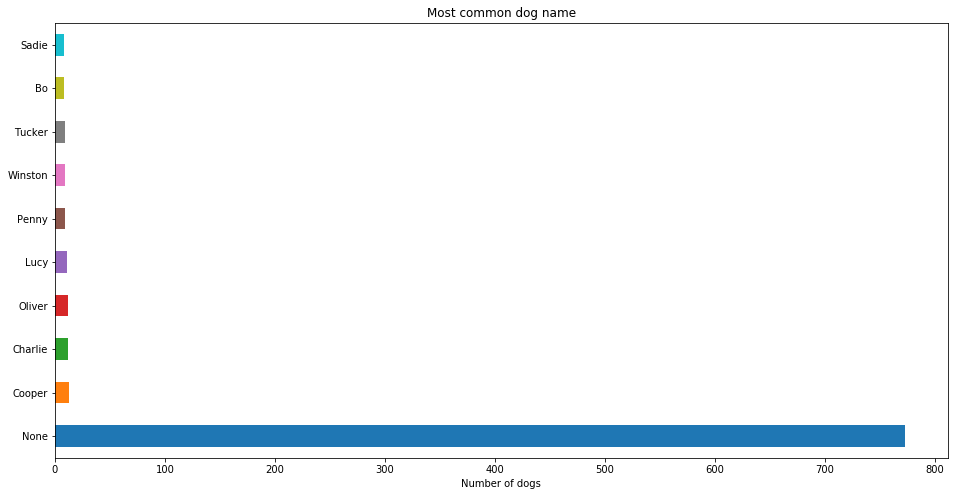

In [5]:
# The most common dog name 
master_df.name.value_counts()[0:10].plot('barh', figsize=(16,8), title='Most common dog name').set_xlabel("Number of dogs");

The most common dog name are Cooper, Charlie, Oliver and Lucy

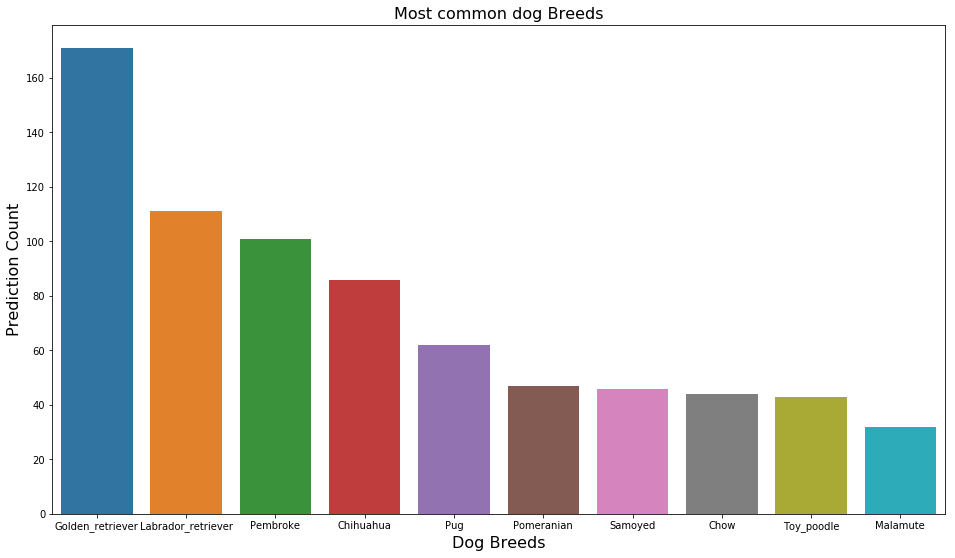

In [7]:
# The most common dog breeds
plt.figure(figsize=(16,9))
ax = sns.barplot(x = master_df['p1'].value_counts()[0:10].index,
                y = master_df['p1'].value_counts()[0:10],
                data = master_df);
plt.xlabel("Dog Breeds",fontsize = 16);
plt.ylabel("Prediction Count",fontsize = 16);
plt.title("Most common dog Breeds",fontsize = 16);

The most common dog breeds are Golden_retriever, Labrador_retriever and Pembrok

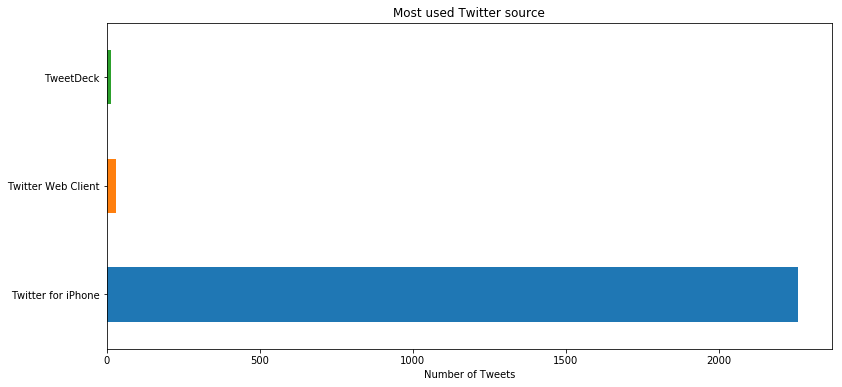

In [8]:
# The most used tweeter source
master_df['source'].value_counts().plot('barh', figsize=(13,6), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

The most used tweeter source is Twitter for iPhone

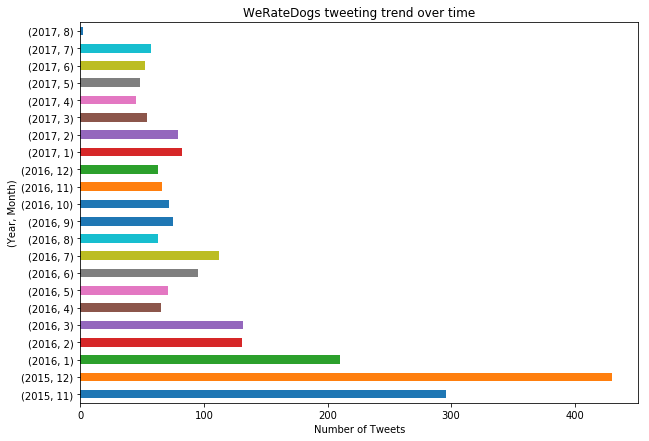

In [34]:
plt.rcParams["figure.figsize"] = [10, 7]
data = master_df.tweet_id.groupby([master_df["timestamp"].dt.year, master_df["timestamp"].dt.month]).count()
ax = data.plot('barh', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("Number of Tweets")
ax.set_ylabel("(Year, Month)")
plt.savefig('tweets_trend')

December 2015 has the highest number of tweets 

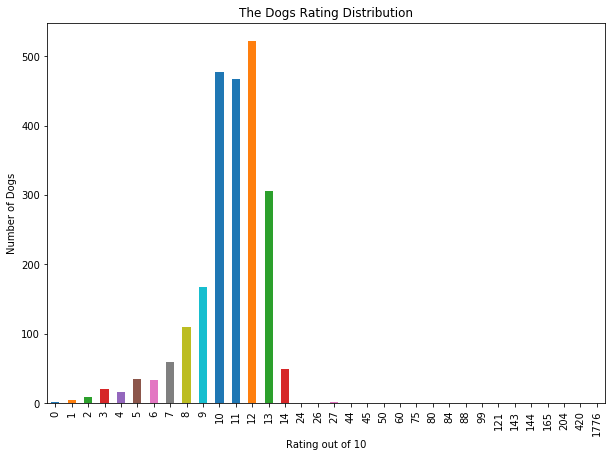

In [35]:
# Dogs rating distributions
ax = master_df.rating_numerator.value_counts().sort_index().plot('bar', title = 'The Dogs Rating Distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 100, 200, 300, 400, 500])
plt.savefig('rating_num')

The highest number of rating is on the scale of 12

Text(-15.075,0.5,'Favorite Count')

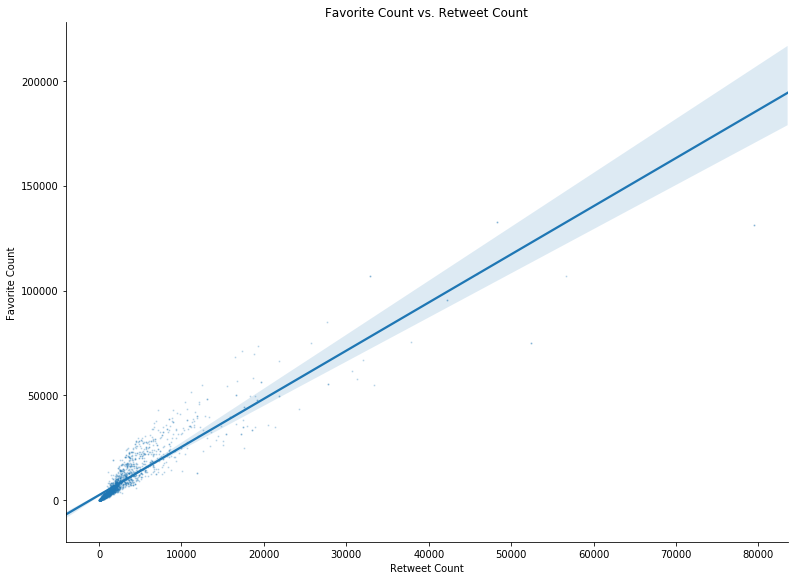

In [12]:
#Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=master_df,
           size = 8,
           aspect=1.4,
           scatter_kws={'s': 1,'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')